In [1]:
import pandas as pd # type: ignore

# Load your preprocessed data (already in the desired format)
data = pd.read_excel("merged_columns_output.xlsx")  # Adjust the path accordingly

# Check the first few rows to confirm the format
data.head()


,Datetime,Bapuji Nagar Bengaluru,BTM Layout Bengaluru CPCB,BWSSB Kadabesanahalli Bengaluru CPCB,City Railway Station Bengaluru,Hebbal Bengaluru,Hombegowda Nagar Bengaluru,Jayanagar 5th Block Bengaluru,Peenya Bengaluru CPCB,Sanegurava Halli Bengaluru,Silk Board Bengaluru
0,2020-01-01 00:00:00,79.0,67.0,109.525253,106.0,99.0,77.0,100.453425,60.0,49.374111,96.627953
1,2020-01-01 01:00:00,79.0,110.0,109.525253,93.0,92.0,82.0,68.000000,62.0,49.374111,96.627953
2,2020-01-01 02:00:00,77.0,38.0,109.525253,89.0,121.0,88.0,83.000000,71.0,49.374111,96.627953
3,2020-01-01 03:00:00,75.0,42.0,109.525253,71.0,93.0,67.0,60.000000,80.0,46.000000,96.627953
4,2020-01-01 04:00:00,70.0,54.0,109.525253,67.0,81.0,64.0,55.000000,70.0,51.000000,96.627953


In [2]:
# Fill missing values using forward fill method
data_filled = data.fillna(method='ffill')

# You can also try interpolation
# data_filled = data.interpolate(method='linear', axis=0)


C:\Users\swaya\AppData\Local\Temp\ipykernel_17176\543652780.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled = data.fillna(method='ffill')


In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_filled.iloc[:, 1:])  # Exclude the Date column

# Check scaled data
scaled_data[:5]


array([[0.15120968, 0.12170385, 0.21905051, 0.2040404 , 0.19477912,
        0.14717742, 0.18791346, 0.11646586, 0.10803963, 0.17001636],
       [0.15120968, 0.20892495, 0.21905051, 0.17777778, 0.18072289,
        0.15725806, 0.12195122, 0.12048193, 0.10803963, 0.17001636],
       [0.14717742, 0.06288032, 0.21905051, 0.16969697, 0.23895582,
        0.16935484, 0.15243902, 0.13855422, 0.10803963, 0.17001636],
       [0.14314516, 0.07099391, 0.21905051, 0.13333333, 0.18273092,
        0.12701613, 0.10569106, 0.15662651, 0.10065646, 0.17001636],
       [0.13306452, 0.09533469, 0.21905051, 0.12525253, 0.15863454,
        0.12096774, 0.09552846, 0.13654618, 0.11159737, 0.17001636]])

In [4]:
import numpy as np

def create_sequences(data, seq_length):
    X = []
    y = []
    
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])  # The input features (X) are the past 'seq_length' time steps
        y.append(data[i + seq_length])  # The output (y) is the AQI at the next time step
        
    return np.array(X), np.array(y)

# Example: Create sequences with 24-hour lookback
seq_length = 24  # This can be adjusted
X, y = create_sequences(scaled_data, seq_length)

# Check shape of the data
X.shape, y.shape


((35040, 24, 10), (35040, 10))

In [5]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import LSTM, Dense, Dropout # type: ignore

# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)  # Predicting a single value (AQI) at the next time step
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

# Save the model after training
model.save('aqi_lstm_model.h5')





Epoch 1/20

876/876 [==============================] - 29s 28ms/step - loss: 0.0063 - val_loss: 0.0053
Epoch 2/20
876/876 [==============================] - 20s 23ms/step - loss: 0.0058 - val_loss: 0.0052
Epoch 3/20
876/876 [==============================] - 32s 36ms/step - loss: 0.0057 - val_loss: 0.0051
Epoch 4/20
876/876 [==============================] - 40s 45ms/step - loss: 0.0057 - val_loss: 0.0052
Epoch 5/20
876/876 [==============================] - 38s 44ms/step - loss: 0.0057 - val_loss: 0.0052
Epoch 6/20
876/876 [==============================] - 39s 45ms/step - loss: 0.0057 - val_loss: 0.0052
Epoch 7/20
876/876 [==============================] - 38s 44ms/step - loss: 0.0057 - val_loss: 0.0052
Epoch 8/20
876/876 [==============================] - 40s 46ms/step - loss: 0.0057 - val_loss: 0.0051
Epoch 9/20
876/876 [==============================] - 28s 32ms/step - loss: 0.0057 - val_loss: 0.0051
Epoch 10/20
876/876 [==============================] - 35s 40ms/step - loss: 0

c:\Users\swaya\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1095/1095 [==============================] - 12s 10ms/step


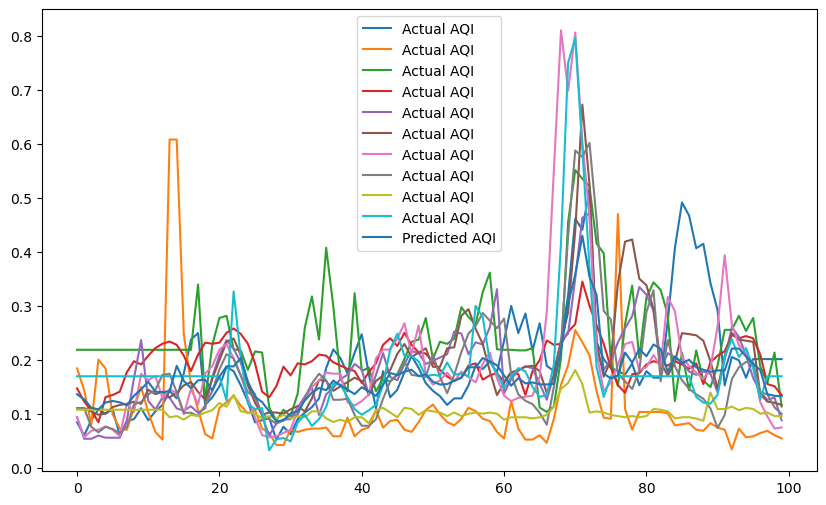

In [6]:
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X)

# Plot actual vs predicted AQI
plt.figure(figsize=(10, 6))
plt.plot(y[:100], label='Actual AQI')  # First 100 points for simplicity
plt.plot(y_pred[:100], label='Predicted AQI')
plt.legend()
plt.show()


In [9]:
from geopy.distance import geodesic

# Example: Coordinates of the stations
station_coords = {
    'Station 1': (12.9716, 77.5946),  # Replace with actual coordinates
    'Station 2': (12.9616, 77.6046),
    # Add more stations
}

# User's location (e.g., from a mobile app)
user_location = (12.9685, 77.6000)  # Replace with the actual user's coordinates

# Find nearest station
nearest_station = min(station_coords, key=lambda station: geodesic(user_location, station_coords[station]).km)
print(f"The nearest station is: {nearest_station}")

# Use the AQI prediction from this station's model


The nearest station is: Station 1
